<a href="https://colab.research.google.com/github/pradeep448/machine-learning/blob/main/tmgm_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [364]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
# read tables
tables=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trades.csv')
tables=tables.iloc[:,1:]
tables.columns=['login_hash' ,
'ticket_hash' ,
'server_hash' ,
'symbol' ,
'digits',
'cmd' ,
'volume' ,
'open_time' ,
'open_price' ,
'close_time' ,
'contractsize' ]
tables.head()

,login_hash,ticket_hash,server_hash,symbol,digits,cmd,volume,open_time,open_price,close_time,contractsize
0,0DF500A57244E5B1670277767BEBB554,B321DC57F3B410507B986DD8962F8B1C,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURUSD,5,1,5,2020-08-19 12:19:11,1.19459,2020-08-19 12:48:09,100000.0
1,6D66E192834605522190E51BF226FF5B,F68DA930EE1129D94EDFA02EBAF9E7B4,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,1,2020-08-28 03:09:02,1925.48000,2020-08-28 06:03:45,100.0
2,04852EC1A7D9FB8A291A24DDCE8C62B9,E351B480079ADEC7F6E6BE3ACEEA6EDF,2F1CA40D76D7E6165DBA3924CE0D3B5C,EURGBP,5,0,10,2020-08-25 13:47:34,0.90157,2020-09-08 12:20:43,100000.0
3,E62BE617269467931F2239C2771605C2,363723A73A926A7434E815F2F1D5ED61,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,10,2020-08-28 02:46:57,1926.68000,2020-08-28 02:51:13,100.0
4,54D2B4C5ECAE5FBC316524329846F81E,9CD4110328DA4CD71FFE0BE486D51094,2F1CA40D76D7E6165DBA3924CE0D3B5C,XAUUSD,2,1,85,2020-08-11 09:27:28,1999.12000,2020-08-11 09:27:54,100.0


In [366]:
# remove null records
tables.dropna(inplace=True)
# check column dtypes
tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99993 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   login_hash    99993 non-null  object 
 1   ticket_hash   99993 non-null  object 
 2   server_hash   99993 non-null  object 
 3   symbol        99993 non-null  object 
 4   digits        99993 non-null  int64  
 5   cmd           99993 non-null  int64  
 6   volume        99993 non-null  int64  
 7   open_time     99993 non-null  object 
 8   open_price    99993 non-null  float64
 9   close_time    99993 non-null  object 
 10  contractsize  99993 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.2+ MB


In [367]:
# read users table
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.csv')
users=users.iloc[:,1:]
users.head()

,login_hash,server_hash,country_hash,currency,enable
0,03A15F382AF3D505592CA69EFD4DC431,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
1,F8ADF5FF9840712CE2AF7FA9EA2A3FA7,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
2,B78CD788AB20A5D61CB13BD5389CABB3,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1
3,DEFB729116227EF8582BFEC65F998489,76791A893BDB9A68E8EE44898D581A60,103357E3E40A9C0E4E9D36110F7BBC7A,USD,1
4,9EAD9A73AA6C93823C56BB8C2E798B45,76791A893BDB9A68E8EE44898D581A60,AE54A5C026F31ADA088992587D92CB3A,USD,1


In [368]:
# convert column from string to datetime object
tables['open_time']=pd.to_datetime(tables['open_time'])
tables['close_time']=pd.to_datetime(tables['close_time'])
# calculate total session length of user
tables['delta_time_min']=tables['close_time']-tables['open_time']
# convert time into minutes, single unit
tables[['delta_time_min']]=tables[['delta_time_min']].applymap(lambda x: x.total_seconds()/60)

In [369]:
# remove not required columns
tables=tables.drop(['open_time','close_time','ticket_hash'],axis=1)

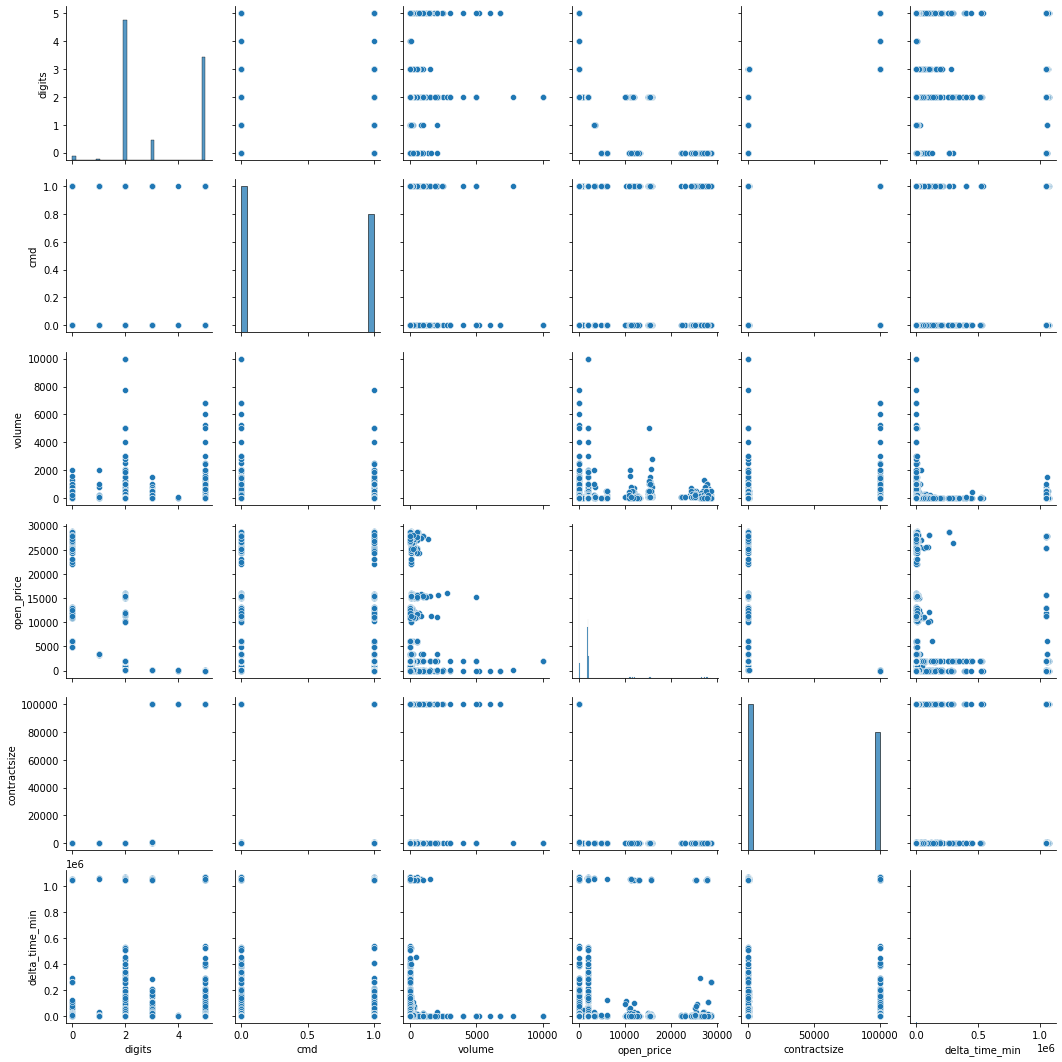

In [370]:
sns.pairplot(tables)

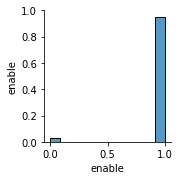

In [371]:
sns.pairplot(users)

(array([9.5066e+04, 8.1000e+01, 3.0000e+01, 2.0000e+01, 1.5000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.7800e+03]),
 array([      0.        ,  107340.70166667,  214681.40333333,
         322022.105     ,  429362.80666667,  536703.50833333,
         644044.21      ,  751384.91166667,  858725.61333333,
         966066.315     , 1073407.01666667]),
 <a list of 10 Patch objects>)

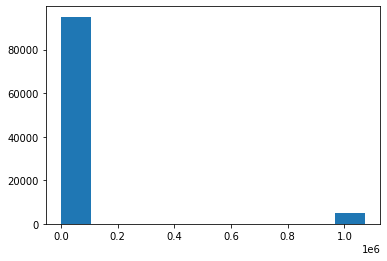

In [372]:
# checking no of sessions with high value
plt.hist(tables['delta_time_min'])

In [373]:
"""
Almost 5 % of sessions are of length around 1000000 minutes.
Need to remove them, as they will affect no of clusters
"""

'\nAlmost 5 % of sessions are of length around 1000000 minutes.\nNeed to remove them, as they will affect no of clusters\n'

In [374]:
# removing sessions of length more than 8000K minutes
tables=tables[tables['delta_time_min']<(0.8*10**6)]

In [375]:
# creating unique HASH column, representing combination of login_hash and server_hash -> to represent unique users
tables['HASH']=tables['login_hash']+tables['server_hash']
users['HASH']=users['login_hash']+users['server_hash']
tables=tables.drop(['login_hash','server_hash'],axis=1)
users=users.drop(['login_hash','server_hash'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
# merging two tables
merged=pd.merge(
    tables,
    users,
    how="inner",
    on='HASH',
    suffixes=("_t", "_u")
    )

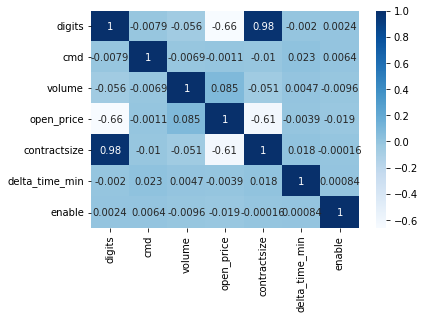

In [377]:
# checking correlation between columns
sns.heatmap(merged.corr(),cmap='Blues',annot=True)

In [378]:
# converting all currencies to USD
def curr_repl(x):
    if x=='USD':
        return 1
    if x=='AUD':
        return 0.74
    else:
        return 0.69

In [379]:
# update currency column with USD only
merged[['currency']]=merged[['currency']].applymap(curr_repl)

In [380]:
# creating sales column indicateing sales in USD
merged['sales']=merged['currency']*merged['open_price']*merged['volume']

In [381]:
# remove non required columns
merged=merged.drop(['volume','currency','open_price','digits','country_hash','symbol'],axis=1)

In [382]:
# label emncoding of HASH column
from sklearn.preprocessing import LabelEncoder

In [383]:
le=LabelEncoder()
merged['HASH']=le.fit_transform(merged['HASH'])
# merged['symbol']=le.fit_transform(merged['symbol'])
# merged.head()

In [384]:
merged=merged.groupby('HASH').mean() # taking mean for all unique users

In [385]:
# extracting 3 principal components
from sklearn.decomposition import PCA
pca=PCA(3)
merged_pca=pca.fit_transform(merged)

In [386]:
# kmeans model
from sklearn.cluster import KMeans

In [387]:
# calculate wcss to find effective no of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(merged)
    wcss.append(kmeans.inertia_)


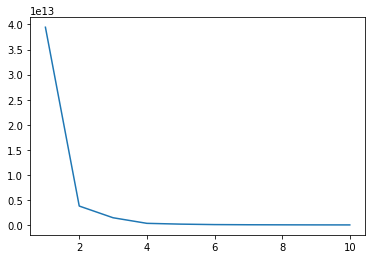

In [388]:
plt.plot(range(1,11),wcss)

Install kneed library to find knee point in wcss graph

In [389]:
!pip install kneed

In [390]:
import kneed
kl=kneed.KneeLocator(range(1,11),wcss,curve="convex", direction="decreasing")
print('elbow point OR effective nof of clusters: ',kl.elbow)

elbow point OR effective nof of clusters:  2


In [391]:
# fitting model with proper no of clusters
kmeans=KMeans(2)
kmeans.fit(merged)

KMeans(n_clusters=2)

In [392]:
merged_pca_df=pd.DataFrame(merged_pca)
merged_pca_df=pd.concat([merged_pca_df,pd.DataFrame(kmeans.labels_)],axis=1)
merged_pca_df.columns=['pc0','pc1','pc2','cluster']

In [393]:
# plotting 3d scatterplot
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(merged_pca_df, x='pc0', y='pc1', z='pc2',color='cluster')
fig.show()

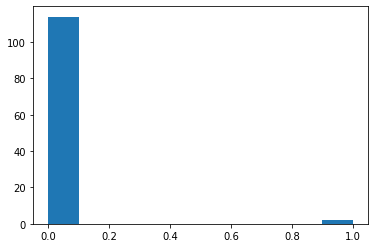

In [394]:
# barplot of no of users in a cluster
plt.hist(merged_pca_df['cluster'])
plt.show()

In [395]:
# no of users in each cluster are
counts=merged_pca_df['cluster'].value_counts()
print('no of users in cluster 0 :',counts[0])
print('no of users in cluster 1 :',counts[1])

no of users in cluster 0 : 114
no of users in cluster 1 : 2


In [396]:
"""
Conclusion:
1 all Hash values in tables and users are not matching. Thats why while merging we lost most of the records.
    -> all users should be there in users table.

"""

'\nConclusion:\n1 all Hash values in tables and users are not matching. Thats why while merging we lost most of the records.\n    -> all users should be there in users table.\n\n'